**Name:** Patrick Mugisha
    
**K-State Honor Code:** "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# HW: Regression (Financial Analytics for Housing Market)

> Background

    This HW is designed to help you master the concepts and techniques for regression analysis, which is a popular supervised machine learning. 

    You need to build a predictive model using regression techniques. The dataset (b_housing.csv) contains housing values in suburbs of Boston. 

# Import Packages and Load Data

In [1]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages (machine learning)
import sklearn.linear_model as lm

#model validation (machine learning)               
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#model evaluation (machine learning)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

#regression analysis (statistics)
import statsmodels.api as sm
from statsmodels.formula.api import ols

#ignore warning
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 1000)

In [2]:
#load and display the data

df=pd.read_csv('data/b_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# 1)	Demonstrate your data inspection skills. Make sure you need to handle those data quality issues before proceeding.

a)	Handle inconsistent/inaccurate data

In [3]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

* There is no missing values in the dataset. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     508 non-null    float64
 1   zn       508 non-null    float64
 2   indus    508 non-null    float64
 3   chas     508 non-null    int64  
 4   nox      508 non-null    float64
 5   rm       508 non-null    float64
 6   age      508 non-null    float64
 7   dis      508 non-null    float64
 8   rad      508 non-null    int64  
 9   tax      508 non-null    int64  
 10  ptratio  508 non-null    float64
 11  lstat    508 non-null    float64
 12  medv     508 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.7 KB


* There are no string columns in the dataset.

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,3.599645,11.368110,11.123917,0.068898,0.554574,6.283561,88.055315,3.801993,9.531496,407.854331,18.442717,12.652185,22.534252
std,8.587406,23.276516,6.849870,0.253530,0.115665,0.701438,441.531284,2.104464,8.694746,168.314766,2.170287,7.126976,9.178975
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.886500,45.075000,2.100525,4.000000,279.000000,17.225000,6.990000,17.075000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.205000,77.150000,3.215700,5.000000,330.000000,19.000000,11.395000,21.200000
75%,3.674807,12.500000,18.100000,0.000000,0.624000,6.620500,94.025000,5.214600,24.000000,666.000000,20.200000,16.945000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,10000.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
df['age'] = df['age'].replace(10000, 10)
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,3.599645,11.368110,11.123917,0.068898,0.554574,6.283561,68.389961,3.801993,9.531496,407.854331,18.442717,12.652185,22.534252
std,8.587406,23.276516,6.849870,0.253530,0.115665,0.701438,28.178597,2.104464,8.694746,168.314766,2.170287,7.126976,9.178975
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.886500,44.850000,2.100525,4.000000,279.000000,17.225000,6.990000,17.075000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.205000,76.950000,3.215700,5.000000,330.000000,19.000000,11.395000,21.200000
75%,3.674807,12.500000,18.100000,0.000000,0.624000,6.620500,93.925000,5.214600,24.000000,666.000000,20.200000,16.945000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
# this code finds the number of unique values in each column.

for col in df.columns:
    print(col, df[col].nunique())

crim 504
zn 26
indus 76
chas 2
nox 81
rm 446
age 356
dis 412
rad 9
tax 66
ptratio 46
lstat 455
medv 229


b) Remove duplicate rows. Follow the steps below.

In [8]:
pd.set_option('display.max_rows', 1000)

In [9]:
df[df.duplicated(keep=False)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
506,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
507,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [10]:
df = df.drop_duplicates(keep='first')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# 2)	Demonstrate your exploratory data analysis (EDA) skills (e.g., correlation analysis, heatmap).  

a)	What X variables appear to influence on the median housing price in Boston?

* chas,dis,zn,rm have the biggest influence on the median housing price in Boston.

In [11]:
df.corr()['medv'].sort_values()

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.371676
chas       0.175260
dis        0.249929
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

<AxesSubplot:>

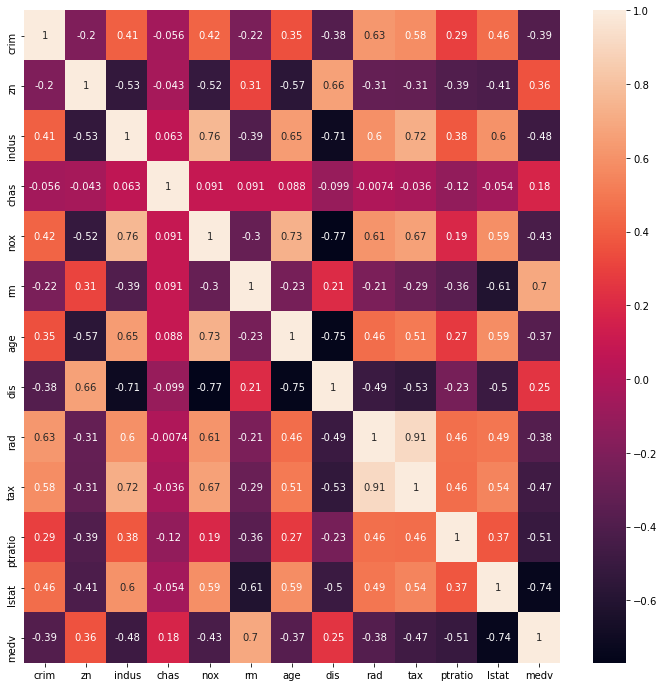

In [12]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)

b)	What X variables are highly correlated to each other?

In [13]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.354166,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.568125,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.645837,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.087976,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.730933,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.233667,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.354166,-0.568125,0.645837,0.087976,0.730933,-0.233667,1.000000,-0.752478,0.457943,0.508568,0.270217,0.585248,-0.371676
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.752478,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.457943,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.508568,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


* Highly correlated X variables: crim with nox,indus,rad,tax,ptratio,Istat 
* Highly correlated X variables: zn with indus,nox,age,dis
* Highly correlated X variables: indus with zn,age,dis,nox,rad,tax,Istat
* Highly correlated X variables: nox with age,dis,rad,tax,Istat
* Highly correlated X variables: rm with lstat
* Highly correlated X variables: age with dis,tax,Istat
* Highly correlated X variables: rad with rad,tax,ptratio,Istat
* Highly correlated X variables: tax with ptratio,Istat
* Highly correlated X variables: ptratio with Istat

# 3)	Demonstrate your data visualization skills (e.g., charts, pivot tables). 

- The focus should be on identifying X variables (independent variables) affecting Y value (dependent variable, MEDV in the dataset). 
- Correlation analysis (Step #2) has already provided some insights about this. Let’s confirm the findings with visualization (and pivot table). 
- What X variables appear to influence on the median housing price in Boston?

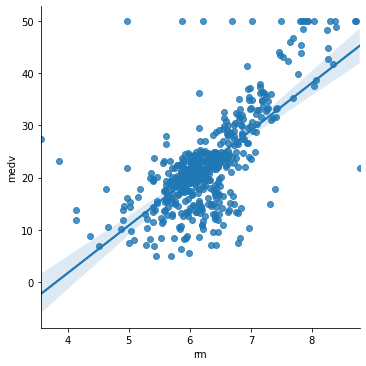

In [14]:
sns.lmplot(x='rm', y='medv', data=df);

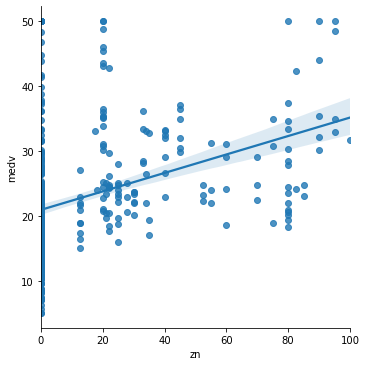

In [15]:
sns.lmplot(x='zn', y='medv', data=df);

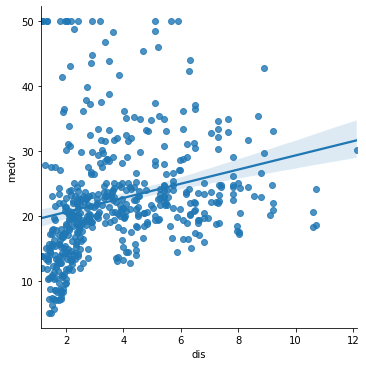

In [16]:
sns.lmplot(x='dis', y='medv', data=df);

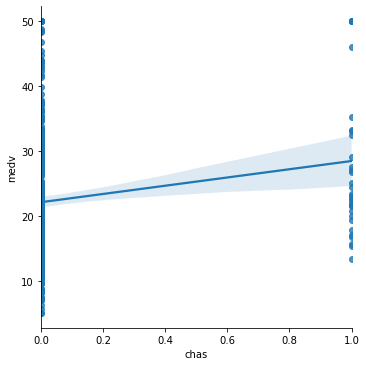

In [17]:
sns.lmplot(x='chas', y='medv', data=df);

In [18]:
grouped = df.groupby(['rm', 'zn', 'dis', 'chas'])
grouped['medv'].agg(['count', 'mean', 'max']).head()

count  mean   max
rm    zn  dis    chas                   
3.561 0.0 1.6132 0         1  27.5  27.5
3.863 0.0 1.5106 0         1  23.1  23.1
4.138 0.0 1.1370 0         1  13.8  13.8
          1.1781 0         1  11.9  11.9
4.368 0.0 1.4395 0         1   8.8   8.8

* X variables rm, zn, dis, and chas appear to influence the median housing price in Boston. 

# 4)	Demonstrate your skills in building, validating and evaluating regression models. 

- Initially, you need to build a multiple regression model. It is important that you use both scikit-learn  and statmodel. You need to report the regression results and provide your interpretations (e.g., coefficients, p-value, R-squared). Split validation is required here.

In [19]:
#assigning columns to X and y variables

y = df['medv'] 
X = df.drop(['medv'], axis =1)  

## Model #1 

#### Split Validation

In [20]:
# split validation (70% training & 30% testing data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(354, 12) (354,) (152, 12) (152,)


### a)	Build the full model (with all X variables) using **Sklearn**

In [21]:
model1 = lm.LinearRegression()      #initialize algorithm you're interested in
model1.fit(X_train, y_train)        #train our model with training dataset
model1_y = model1.predict(X_test)   #predicts y-value using training data above

In [22]:
# this is regression so it has coefficients and y-intercept

print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [-1.22021112e-01  4.50817449e-02  7.23816444e-03  2.66915002e+00
 -1.69545780e+01  3.79210724e+00 -7.86210412e-03 -1.52502260e+00
  2.23971891e-01 -1.11656390e-02 -9.94502924e-01 -5.10691158e-01]
y-intercept  41.27227430363092


In [23]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_)))).round(2)

,0,1
0,crim,-0.12
1,zn,0.05
2,indus,0.01
3,chas,2.67
4,nox,-16.95
5,rm,3.79
6,age,-0.01
7,dis,-1.53
8,rad,0.22
9,tax,-0.01


#### Model Evaluation

In [24]:
print("mean square error: ", mean_squared_error(y_test, model1_y))
print("variance or r-squared: ", explained_variance_score(y_test, model1_y))

mean square error:  28.10372322254597
variance or r-squared:  0.662915034776693


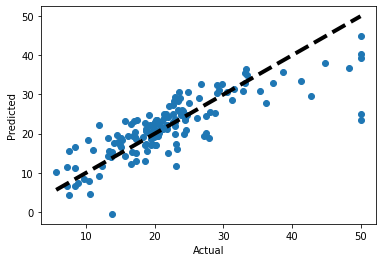

In [25]:
plt.subplots()
plt.scatter(y_test, model1_y)       
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

* This full model seems to be a good one since most actual data points are closely alligned with the predicted dotted line. and it has r-squared of 0.663

# Statmodel


b) Build the full model (with all X variables) using statsmodel. Interpret p value.

In [26]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [27]:
runs_reg_model = ols("medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat",df)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          2.31e-133
Time:                        21:09:18   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5192      4.938      8.409      0.0

* Interpretation of coefficients: some coeficients have a negative value even though they are highly correlated with the Y, but since this is a stats model we are going to focus on what the p-value says.  

* Interpretation of p value: for every X variable with p-value less than 0.05 we consider it significant. for those X variables with p-value more than 0.05 we considered them not influential at all (indus and age).

* Interpretation of R-sqaured: measure of how well the linear model fit a set of observation. r-sqaured is 0.734 which is good

In [28]:
#the residual is small which is good
runs_reg.mse_resid.round(2)

23.02

In [29]:
runs_reg.params.round(2)

Intercept    41.52
crim         -0.12
zn            0.05
indus         0.01
chas          2.85
nox         -18.47
rm            3.68
age          -0.00
dis          -1.51
rad           0.29
tax          -0.01
ptratio      -0.93
lstat        -0.55
dtype: float64

# 5)	Demonstrate your understanding of advanced regression techniques such as regularization and feature selection. 

- Now, you need to build regression models using **regularization** and **feature selection**. The goal is to find the best regression model, which is (1) complex enough to be realistic and (2) simple enough to be practical.

a)	Build a regularized model using Lasso

b)	Build models using feature selection techniques.

## A. Regularization

### Lasso

#### Model #2

In [30]:
#Fit the Lasso model

model2 = lm.Lasso(alpha=1)           
model2.fit(X_train, y_train)        
model2_y = model2.predict(X_test)

In [31]:
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [-0.06644722  0.04916268 -0.          0.         -0.          0.81679391
  0.01358315 -0.76026996  0.18302713 -0.01435276 -0.81753716 -0.757893  ]
y-intercept  47.74491908121457


In [32]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [i for i in X.columns]
sorted(zip(coef, xcolumns), reverse=True)

[('0.817', 'rm'),
 ('0.183', 'rad'),
 ('0.049', 'zn'),
 ('0.014', 'age'),
 ('0.000', 'chas'),
 ('-0.818', 'ptratio'),
 ('-0.760', 'dis'),
 ('-0.758', 'lstat'),
 ('-0.066', 'crim'),
 ('-0.014', 'tax'),
 ('-0.000', 'nox'),
 ('-0.000', 'indus')]

In [33]:
pd.DataFrame(list(zip(X.columns, np.transpose(model2.coef_)))).round(2)

,0,1
0,crim,-0.07
1,zn,0.05
2,indus,-0.00
3,chas,0.00
4,nox,-0.00
5,rm,0.82
6,age,0.01
7,dis,-0.76
8,rad,0.18
9,tax,-0.01


In [34]:
print("mean square error: ", mean_squared_error(y_test, model2_y))
print("variance or r-squared: ", explained_variance_score(y_test, model2_y))

mean square error:  33.27132718036203
variance or r-squared:  0.6013043462625628


* This regularized model using Lasso has a r-squared of 0.601.

## B. Feature selection

### f_regression

#### Model #3

In [35]:
#we want to select only the best 2 X variables 

X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

In [36]:
# Let's find out the 2 columns containing the most useful predictors

selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 5 11]


* f_regression determines that **rm** and **lstat** are the two most important predictors

## Model #3 - Using feature selection

In [37]:
# I Choose 2 variables (rm, lstat) and develop a multiple linear regression model (model3).

y_new = df['medv'] 
X_new = df[['rm', 'lstat']]

#### Model validation

In [38]:
# split validation (70% training & 30% testing data)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(354, 2) (354,) (152, 2) (152,)


#### Model building

In [39]:
model3 = lm.LinearRegression()
model3.fit(X_train, y_train)   
model3_y = model3.predict(X_test)

In [40]:
coef = ["%.3f" % i for i in model2.coef_]
x2columns = [i for i in X.columns]
sorted(zip(coef, x2columns), reverse=True)

[('0.817', 'rm'),
 ('0.183', 'rad'),
 ('0.049', 'zn'),
 ('0.014', 'age'),
 ('0.000', 'chas'),
 ('-0.818', 'ptratio'),
 ('-0.760', 'dis'),
 ('-0.758', 'lstat'),
 ('-0.066', 'crim'),
 ('-0.014', 'tax'),
 ('-0.000', 'nox'),
 ('-0.000', 'indus')]

In [41]:
pd.DataFrame(list(zip(X.columns, np.transpose(model3.coef_)))).round(2)

,0,1
0,crim,5.27
1,zn,-0.64


In [42]:
print("y-intercept ", model3.intercept_)

y-intercept  -2.53724671894393


In [43]:
print("mean square error: ", mean_squared_error(y_test, model3_y))
print("variance or r-squared: ", explained_variance_score(y_test, model3_y))

mean square error:  32.725071692814936
variance or r-squared:  0.6073004488050283


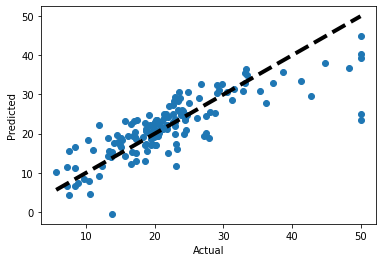

In [44]:
plt.subplots()
plt.scatter(y_test, model1_y)       
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

* Model #3 has R-squared of 0.607.

### RFE (Recursive Feature Selection)

In [45]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print("Features sorted by their rank:")
print(sorted(zip([x for x in rfe.ranking_], X.columns)))

Features sorted by their rank:
[(1, 'nox'), (1, 'rm'), (2, 'chas'), (3, 'ptratio'), (4, 'dis'), (5, 'lstat'), (6, 'rad'), (7, 'crim'), (8, 'indus'), (9, 'zn'), (10, 'tax'), (11, 'age')]


* X varibles are listed in terms of most important(nox,rm) to least important(age). 

## Model #4 - Using RFE

In [46]:
# I Choose 2 variables (rm, nox) and develop a multiple linear regression model (model4).

y_new = df['medv'] 
X_new = df[['rm', 'nox']]

#### Model validation

In [47]:
# split validation (70% training & 30% testing data)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(354, 2) (354,) (152, 2) (152,)


#### Model building

In [48]:
model4 = lm.LinearRegression()
model4.fit(X_train, y_train)   
model4_y = model4.predict(X_test)

In [49]:
pd.DataFrame(list(zip(X_new.columns, np.transpose(model4.coef_)))).round(2)

,0,1
0,rm,8.40
1,nox,-19.79


In [50]:
print("y-intercept ", model4.intercept_)

y-intercept  -19.252795320173213


In [51]:
print("mean square error: ", mean_squared_error(y_test, model4_y))
print("variance or r-squared: ", explained_variance_score(y_test, model4_y))

mean square error:  43.740759042790195
variance or r-squared:  0.47490208212844354


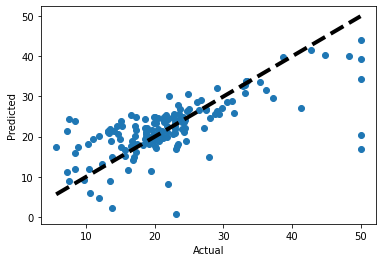

In [52]:
plt.subplots()
plt.scatter(y_test, model4_y)       
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

* Model 4 has r-squared of 0.475 which is not good.

# 6)	Demonstrate your skills in model selection and storytelling. At this stage, you have chosen the best regression model for predicting Boston housing prices from Step #4 and #5.

a)	What is your best model? Explain the model.

* The best model is the full model (Model #1) it has all the X variables.

b)	How good is your model?

* It has the best R-squared(0.663) the best of all the models I made.

c)	You can visualize actual Y vs. predicted Y using a scatter plot.

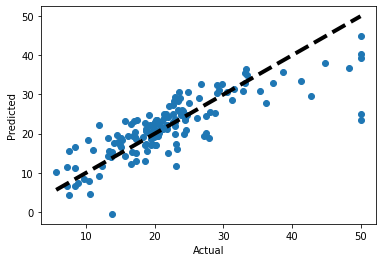

In [53]:
# scatter plot for Lasso model

plt.subplots()
plt.scatter(y_test, model1_y)       
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 7)	Now, demonstrate your skills in model deployment. 

Apply your best model into the scoring dataset provided (b_housing_scoringdataset.csv).

In [54]:
# loading the scoring dataset

df2=pd.read_csv('data/b_housing_scoringdataset.csv')
df2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     50 non-null     float64
 1   zn       50 non-null     float64
 2   indus    50 non-null     float64
 3   chas     50 non-null     int64  
 4   nox      50 non-null     float64
 5   rm       50 non-null     float64
 6   age      50 non-null     float64
 7   dis      50 non-null     float64
 8   rad      50 non-null     int64  
 9   tax      50 non-null     int64  
 10  ptratio  50 non-null     float64
 11  lstat    50 non-null     float64
dtypes: float64(9), int64(3)
memory usage: 4.8 KB


In [56]:
# We use model1 to predict y value.

columns = df2[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
model1.predict(columns)

array([30.32109123, 24.89826935, 30.54501899, 28.54550415, 27.81945885,
       25.13120465, 22.97544293, 19.31677971, 11.52050624, 18.82525121,
       18.83039785, 21.38740311, 21.2174134 , 19.39227602, 19.12340868,
       19.2094741 , 20.71948557, 16.78457144, 17.33741354, 18.32517939,
       12.46451358, 17.42605119, 15.58788446, 13.53199182, 15.39242138,
       14.02389075, 15.34119727, 15.29291961, 19.25597275, 20.71029604,
       11.58256608, 17.8408832 , 10.30599424, 14.37772594, 14.82991658,
       23.65179215, 22.44198485, 23.13453524, 23.08966492, 31.46816605,
       34.33644274, 28.43332704, 25.62809476, 24.95354359, 23.07860004,
       22.26307386, 20.64719386, 17.88412211,  9.00243221, 17.16739937])

# 8)	Demonstrate your storytelling skills. 

a) Managerial implications: Discuss your regression model(s) for potential home buyers, real estate agents, city planners and other stakeholders. What variables are important in predicting the housing prices in Boston? And How important are they?

* In order to get the best deal/value on a house you want to buy, there are a couple factors you need to consider(X variables) because they determine the price of the house. In the models I made I considered the following x variables: crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, lstat as the best predictors of the housing prices in Boston. 

b) Discuss technical implications: Do you think if your best model (and your managerial recommendations) can be used in other cities? What kinds of additional data (X or independent variables) would you need to build a better regression model

* My best model is specific to the data collected in Boston alone, it would not accurately predict housing prices of other cities because the data would be way off. for example if i wanted to see the housing values in suburbs of Olathe,KS and the factors influencing the housing values, the variable CHAS would be irrelevant since there is no Charles River in Olathe.
* To build a better regression model i would like to include the physical condition of the houses, cost of living, proximity to easy mode of transportation around town.  